# Predykcja ocen studentów 

Mateusz Tkacz 248961  
Adrian Sobecki 248942

#### Dane pochodzą z dwóch portugalskich szkół średnich. Zawierają one szczegółowe dane na temat uczniów wraz z ocenami końcowymi za każdy rok nauki z matematyki oraz języka portugalskiego. Baza danych znajduje się na stronie Kaggle: https://www.kaggle.com/datasets/whenamancodes/student-performance?select=Maths.csv
#### Dane zawierają 33 zmienne:

- school      -	szkoła, do której uczęszcza uczeń   (binara: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira) <br>
- sex	        -   płeć ucznia (binarna: 'F' - kobieta, 'M' - mężczyzna)<br>
- age         -	wiek ucznia (liczbowa: od 15 do 22)<br>
- address     -	typ miejsca zamieszkania studenta (binarna: 'U' - miejski, 'R' - wiejski)<br>
- famsize     -   liczebność rodziny (binarna: 'LE3' - mniej lub 3, 'GT3' - więcej niż 3)<br>
- Pstatus     -	status rodziców (binarna: 'T' - mieszkają razem, 'A' - mieszkają rozdzielnie)<br>
- Medu        -	wykształcenie matki (liczbowa: 0 - brak, 1 - edukacja podstawowa (4. klasa), 2 - 5. do 9. klasy, 3 - wykształcenie średnie, 4 - wykształcenie wyższe)<br>
- Fedu        -	wykształcenie ojca (liczbowa: 0 - brak, 1 - edukacja podstawowa (4. klasa), 2 - 5. do 9. klasy, 3 - wykształcenie średnie, 4 - wykształcenie wyższe)<br>
- Mjob        -	zawód matki (kategoryczna: 'teacher' nauczycielka, 'health' służba zdrowia, usługi/służby 'services' (np. administracja, policja), 'at_home' w domu, 'other' inne)<br>
- Fjob        -	zawód ojca (kategoryczna: 'teacher' nauczyciel, 'health' służba zdrowia, usługi/służby 'services' (np. administracja, policja), 'at_home' w domu, 'other' inne)<br>
- reason      -	powód wybrania danej szkoły (kategoryczna: blisko domu 'home', reputacja szkoły 'reputation', 'course' preferencje dot. programu, 'other' inne)<br>
- guardian    -	opiekun ucznia (kategoryczna: 'mother' matka, 'father' ojciec, 'other' inny)<br>
- traveltime  -   czas dotarcia z domu do szkoły (liczbowa: 1 - <15 min., 2 - 15 do 30 min., 3 - 30 min. do 1 godziny, 4 - >1 godziny<br>
- studytime   -	tygodniowy czas nauki (liczbowa: 1 - <2 godziny, 2 - 2 do 5 godzin, 3 - 5 do 10 godzin, 4 - >10 godzin)<br>
- failures    -	liczba niezaliczonych przedmiotów (liczbowa: 0, 1, 2, 3)<br>
- schoolsup   -	dodatkowa pomoc naukowa (binarna: yes, no)<br>
- famsup      -	pomoc naukowa ze strony rodziny (binarna: yes, no)<br>
- paid	    -   dodatkowe płatne zajęcia w zakresie rozpatrywanych (matematyka, j. portugalski) (binarna: yes, no)<br>
- activities  -	zajęcia dodatkowe (binarna: yes, no)<br>
- nursery	    -   uszczęszczano do przedszkola (binarna: yes, no)<br>
- higher	    -   chęć zdobycia wykształcenia wyższego (binarna: yes, no)<br>
- internet    -	dostęp do internetu w domu (binarna: yes, no)<br>
- romantic    -	w związku romantycznym (binarna: yes, no)<br>
- famrel	    -   jakość relacji rodzinnych (liczbowa: od 1 - bardzo zła do 5 - bardzo dobra)<br>
- freetime    -	czas wolny po szkole (liczbowa: od 1 - bardzo mało do 5 - bardzo dużo)<br>
- goout	    -   wychodzenie z przyjaciółmi (liczbowa: od 1 - bardzo mało do 5 - bardzo dużo)<br>
- Dalc	    -   spożycie alkoholu w dni robocze (liczbowa: od 1 - bardzo małe do 5 - bardzo duże)<br>
- Walc	    -   spożycie alkoholu w weekend (liczbowa: od 1 - bardzo małe do 5 - bardzo duże)<br>
- health	    -   status zdrowotny (liczbowa: od 1 - bardzo zły do 5 - bardzo dobry)<br>
- absences	-   liczba nieobecności (liczbowa: od 0 do 93)<br>  
    
- G1          -   ocena z pierwszej klasy (liczbowa: od 0 do 20)<br>
- G2          -   ocena z drugiej klasy (liczbowa: od 0 do 20)<br>
- G3          -   ocena z trzeciej klasy (liczbowa: od 0 do 20)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.manifold import TSNE
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import copy
from sklearn.decomposition import PCA

In [14]:
df_maths = pd.read_csv('data/maths.csv', sep=';')
df_portugese = pd.read_csv('data/portugese.csv', sep=';')

#### Sprawdzenie, czy w którejś z kolumn nie brakuje wartości

In [3]:
bad_columns = [feature for feature in df_portugese.columns if df_portugese[feature].isnull().sum() >= 1]
print(bad_columns)
bad_columns = [feature for feature in df_maths.columns if df_maths[feature].isnull().sum() >= 1]
print(bad_columns)

[]
[]


#### Wyrysowanie histogramów zmiennych dla j. portugalskiego

In [ ]:
for feature in df_portugese.columns:
    data = copy.copy(df_portugese[feature])
    num_attributes = df_portugese[feature].nunique()
    data.value_counts(sort=False).sort_index().plot(kind='bar', grid=True, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel('Ilość')
    plt.show()

#### Wyrysowanie histogramów zmiennych dla matematyki

In [ ]:
for feature in df_maths.columns:
    data = copy.copy(df_maths[feature])
    num_attributes = df_maths[feature].nunique()
    data.value_counts(sort=False).sort_index().plot(kind='bar', grid=True, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel('Ilość')
    plt.show()

#### Wizualizacja rozkładu wybranych zmiennych

#### Zmiana typu zmiennych na typ liczbowy

In [18]:
data_dictionary = {
    'reason': ['reputation', 'home', 'course', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other']
}

df_maths['school'] = np.where(df_maths['school'] == 'GP', 0, 1)
df_maths['sex'] = np.where(df_maths['sex'] == 'F', 0, 1)
df_maths['address'] = np.where(df_maths['address'] == 'U', 0, 1)
df_maths['famsize'] = np.where(df_maths['famsize'] == 'LE3', 0, 1)
df_maths['Pstatus'] = np.where(df_maths['Pstatus'] == 'A', 0, 1)

index = 0
for x in data_dictionary['reason']:
    df_maths.loc[df_maths['reason'] == x, 'reason'] = index
    index += 1

index = 0
for x in data_dictionary['guardian']:
    df_maths.loc[df_maths['guardian'] == x, 'guardian'] = index
    index += 1

index = 0
for x in data_dictionary['Mjob']:
    df_maths.loc[df_maths['Mjob'] == x, 'Mjob'] = index
    index += 1

index = 0
for x in data_dictionary['Fjob']:
    df_maths.loc[df_maths['Fjob'] == x, 'Fjob'] = index
    index += 1

for x in data_dictionary:
    df_maths.loc[:, x] = df_maths.loc[:, x].astype('int64')

df_maths['schoolsup'] = np.where(df_maths['schoolsup'] == 'no', 0, 1)
df_maths['famsup'] = np.where(df_maths['famsup'] == 'no', 0, 1)
df_maths['paid'] = np.where(df_maths['paid'] == 'no', 0, 1)
df_maths['activities'] = np.where(df_maths['activities'] == 'no', 0, 1)
df_maths['nursery'] = np.where(df_maths['nursery'] == 'no', 0, 1)
df_maths['higher'] = np.where(df_maths['higher'] == 'no', 0, 1)
df_maths['internet'] = np.where(df_maths['internet'] == 'no', 0, 1)
df_maths['romantic'] = np.where(df_maths['romantic'] == 'no', 0, 1)

In [19]:
df_portugese['school'] = np.where(df_portugese['school'] == 'GP', 0, 1)
df_portugese['sex'] = np.where(df_portugese['sex'] == 'F', 0, 1)
df_portugese['address'] = np.where(df_portugese['address'] == 'U', 0, 1)
df_portugese['famsize'] = np.where(df_portugese['famsize'] == 'LE3', 0, 1)
df_portugese['Pstatus'] = np.where(df_portugese['Pstatus'] == 'A', 0, 1)

index = 0
for x in data_dictionary['reason']:
    df_portugese.loc[df_portugese['reason'] == x, 'reason'] = index
    index += 1

index = 0
for x in data_dictionary['guardian']:
    df_portugese.loc[df_portugese['guardian'] == x, 'guardian'] = index
    index += 1

index = 0
for x in data_dictionary['Mjob']:
    df_portugese.loc[df_portugese['Mjob'] == x, 'Mjob'] = index
    index += 1

index = 0
for x in data_dictionary['Fjob']:
    df_portugese.loc[df_portugese['Fjob'] == x, 'Fjob'] = index
    index += 1

for x in data_dictionary:
    df_portugese.loc[:, x] = df_portugese.loc[:, x].astype('int64')

df_portugese['schoolsup'] = np.where(df_portugese['schoolsup'] == 'no', 0, 1)
df_portugese['famsup'] = np.where(df_portugese['famsup'] == 'no', 0, 1)
df_portugese['paid'] = np.where(df_portugese['paid'] == 'no', 0, 1)
df_portugese['activities'] = np.where(df_portugese['activities'] == 'no', 0, 1)
df_portugese['nursery'] = np.where(df_portugese['nursery'] == 'no', 0, 1)
df_portugese['higher'] = np.where(df_portugese['higher'] == 'no', 0, 1)
df_portugese['internet'] = np.where(df_portugese['internet'] == 'no', 0, 1)
df_portugese['romantic'] = np.where(df_portugese['romantic'] == 'no', 0, 1)

#### Korelacja zmiennych dla ocen z j. portugalskiego

<AxesSubplot:>

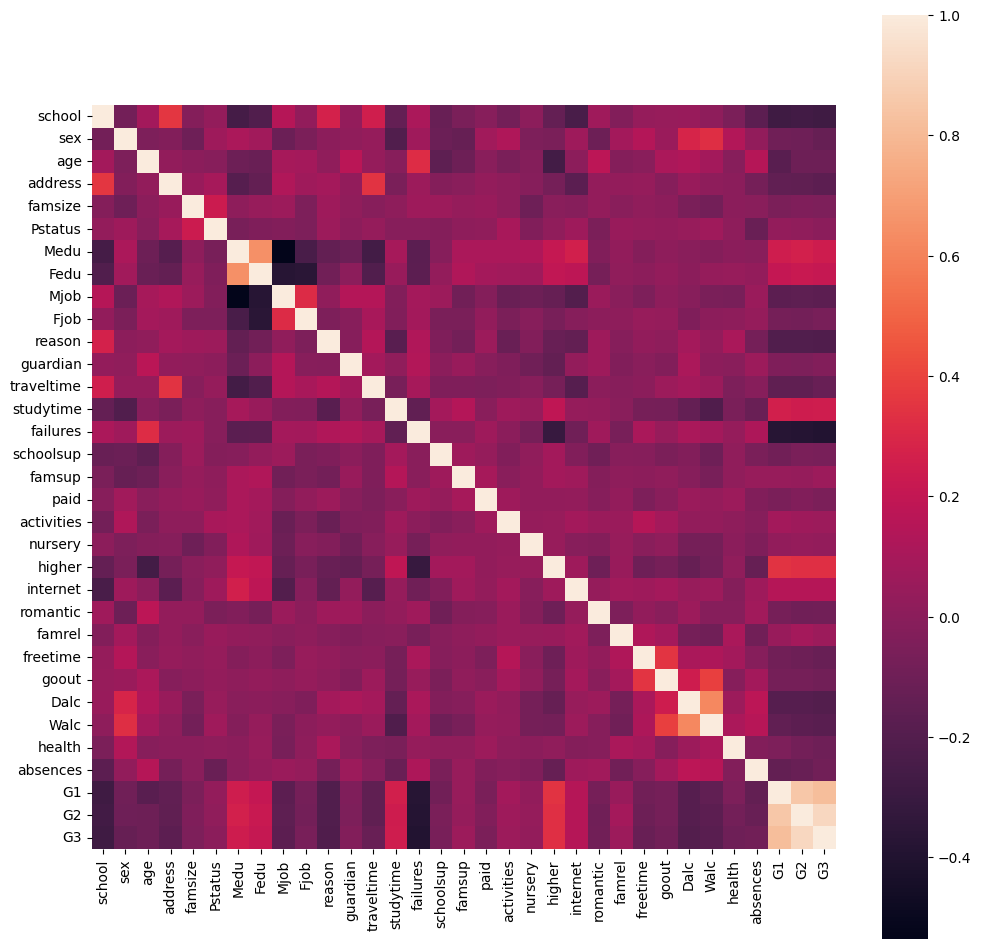

In [20]:
corr_table = df_portugese.corr(method='pearson')
labels = [feature for feature in df_portugese.columns]

f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_portugese.corr(), xticklabels=True, yticklabels=True, square = True)
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)

# ax.matshow(corr_table)
# ax.set_yticks(np.arange(len(labels)))
# ax.set_xticks(np.arange(len(labels)))
# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels, rotation=90)
# ax.set_title('Portugese correlation')

# plt.show()

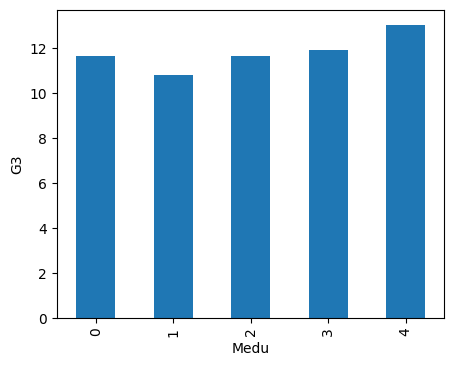

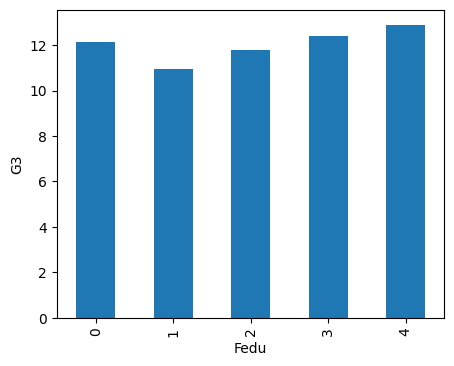

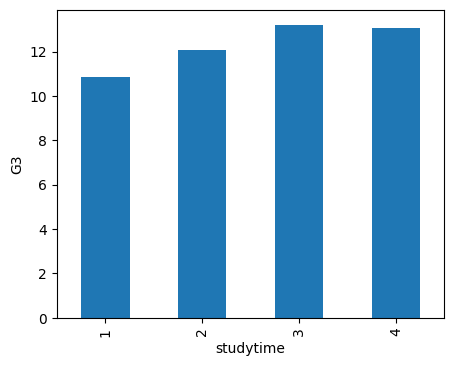

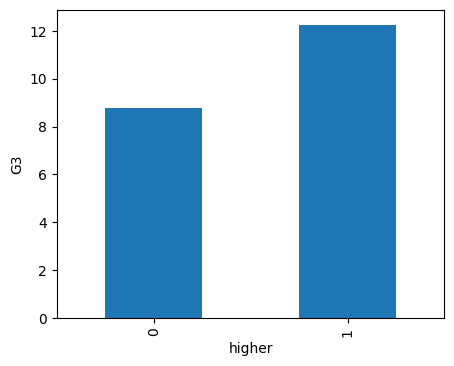

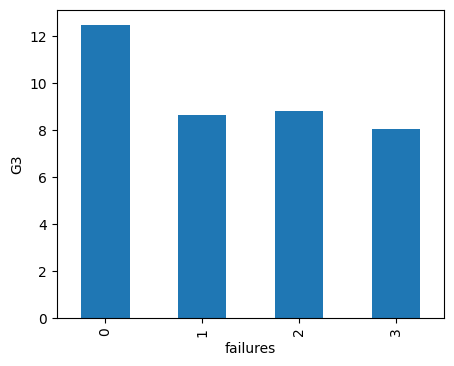

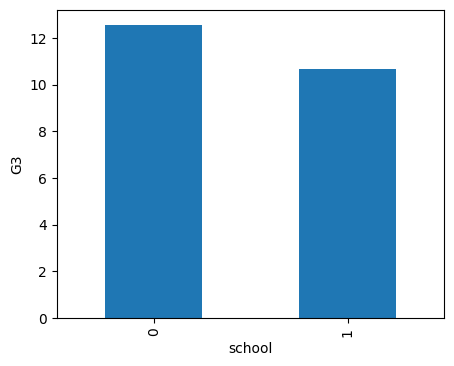

In [162]:
features = ['Medu', 'Fedu', 'studytime', 'higher', 'failures', 'school']

for feature in features:
    df_portugese.groupby(feature)['G3'].mean().plot(kind='bar', figsize=(5,4))
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.show()

In [10]:
# sns.heatmap(pd.concat([df_maths.groupby('sex')['Dalc'].value_counts()[0], df_maths.groupby('sex')['Dalc'].value_counts()[1]], axis=1, keys=['female', 'male']))

<AxesSubplot:xlabel='school', ylabel='address'>

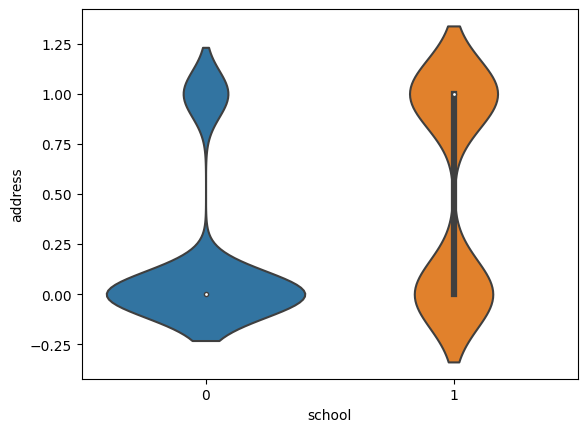

In [23]:
sns.violinplot(data=df_portugese, x='school', y='address')

<AxesSubplot:xlabel='sex', ylabel='Dalc'>

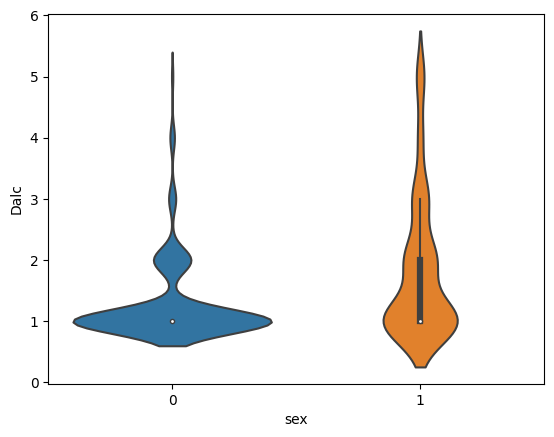

In [22]:
sns.violinplot(data=df_portugese, x='sex', y='Dalc', )

Można zauważyć, że w przypadku ocen z j. portugalskiego, są one skorelowane głównie z ocenami z poprzednich lat. Jednak widać też zależność z wykształceniem obu rodziców, chęcią zdobycia wyższego wykształcenia oraz czasu nauki. Występuje też odwrotna korelacja dla liczby niezaliczonych przedmiotów, spożycia alkoholu oraz szkoły (w szkole Gabriela Pereiry częściej występują wyższe oceny z j. portugalskiego). Inne wnioski:
- Z wynika, że mężczyźni w większym stopniu spożywają alkohol,
- Wyższe wykształcenie może wpływać na posiadanie dostępu do internetu (np. pośrednio przez zarobki),
- Starsze osoby częściej niezaliczają przedmiotów, co może być spowodowane tym, że osoby, które powtarzają klasę mają większe szanse, na ponowne niezaliczenie oraz tym, że poziom trudności w kolejnych latach nauki rośnie ,
- Możliwe, że szkoła Mousinho da Silveiry jest położona bliżej terenów wiejskich gdyż czas dojazdu do niej jest większy i uczęszcza tam więcej uczniów ze wsi

In [7]:
df_portugese.iloc[:, 30:33].columns

Index(['G1', 'G2', 'G3'], dtype='object')

c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


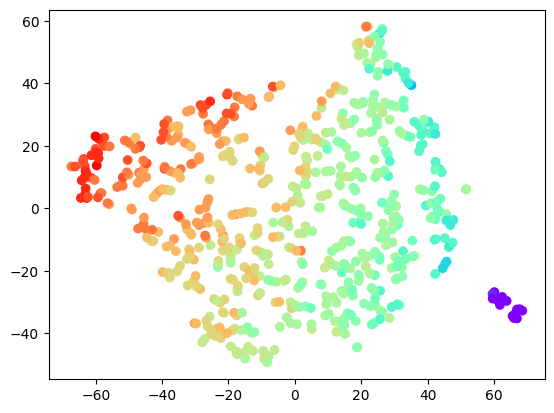

In [244]:
port_embedded = TSNE(n_components=2, perplexity=8, learning_rate='auto', init='pca').fit_transform(df_portugese.iloc[:, 0:33].values)
plt.scatter(x = port_embedded[:,0], y=port_embedded[:, 1], cmap=plt.cm.rainbow, c=df_portugese.iloc[:,32].values)

c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


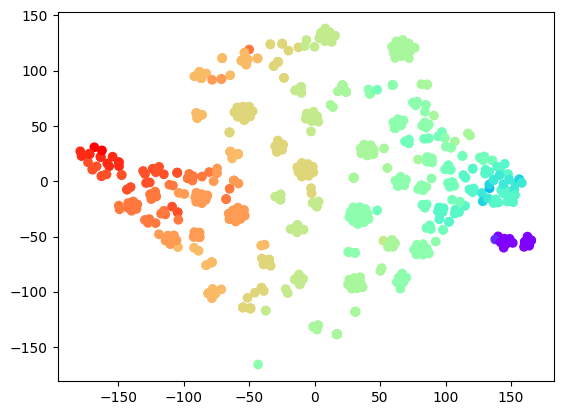

In [224]:
port_embedded = TSNE(n_components=2, perplexity=13, learning_rate='auto', init='pca').fit_transform(df_portugese.iloc[:, 30:33].values)
plt.scatter(x = port_embedded[:,0], y=port_embedded[:, 1], cmap=plt.cm.rainbow, c=df_portugese.iloc[:,32].values)

In [125]:
y = df_portugese['G3'].values
X = df_portugese.iloc[:,:30].values        # all features without G1 and G2

In [126]:
selector = SelectKBest(f_regression, k=10)

In [127]:
X_kBest = selector.fit_transform(X, y)

In [128]:
mask = selector.get_support(indices=True)
features = df_portugese.iloc[:, mask]
print(features.columns.values)

['school' 'address' 'Medu' 'Fedu' 'reason' 'studytime' 'failures' 'higher'
 'Dalc' 'Walc']


c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


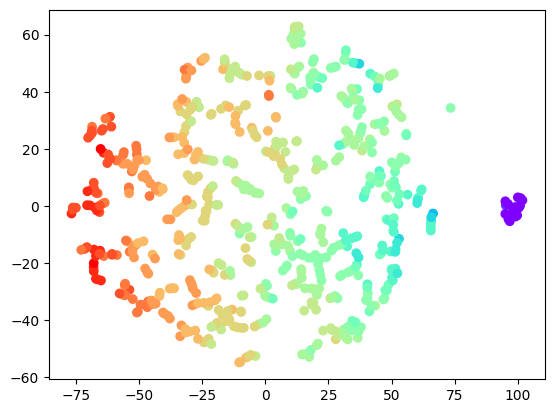

In [313]:
port_embedded = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='pca').fit_transform(pd.concat([df_portugese.loc[:,features.columns], df_portugese.loc[:, 'G3']], axis=1))
plt.scatter(x = port_embedded[:,0], y=port_embedded[:, 1], cmap=plt.cm.rainbow, c=y)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X_kBest, y, test_size=.15)

In [69]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [baseRent]')
  plt.legend()
  plt.grid(True)

In [70]:
def compute_rmse(model, X, y_true, name):
    y_pred = model.predict(X).round()
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    # rmse = pow(mse,0.5)
    print(f'Root Mean Squared Error for {name}: {rmse}')

In [71]:
def compute_mae(model, X, y_true, name):
    y_pred = model.predict(X).round()
    mae =  mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')

In [72]:
def compute_r2(model, X, y_true, name):
    y_pred = model.predict(X).round()
    r2 =  r2_score(y_true, y_pred)
    print(f'R2 for {name}: {r2}')

In [342]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1])),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_63 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [343]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=.15)

Train on 470 samples, validate on 83 samples
Epoch 1/150
470/470 [==============================] - 0s 997us/sample - loss: 10.6725 - val_loss: 10.7204
Epoch 2/150
470/470 [==============================] - 0s 51us/sample - loss: 8.5177 - val_loss: 7.7336
Epoch 3/150
470/470 [==============================] - 0s 51us/sample - loss: 4.8913 - val_loss: 3.4814
Epoch 4/150
470/470 [==============================] - 0s 53us/sample - loss: 3.4793 - val_loss: 3.2100
Epoch 5/150
470/470 [==============================] - 0s 49us/sample - loss: 3.0837 - val_loss: 3.2652
Epoch 6/150
470/470 [==============================] - 0s 53us/sample - loss: 2.8357 - val_loss: 3.0425
Epoch 7/150
470/470 [==============================] - 0s 51us/sample - loss: 2.6677 - val_loss: 2.9705
Epoch 8/150
470/470 [==============================] - 0s 51us/sample - loss: 2.5899 - val_loss: 2.8781
Epoch 9/150
470/470 [==============================] - 0s 51us/sample - loss: 2.5104 - val_loss: 2.7584
Epoch 10/150
470

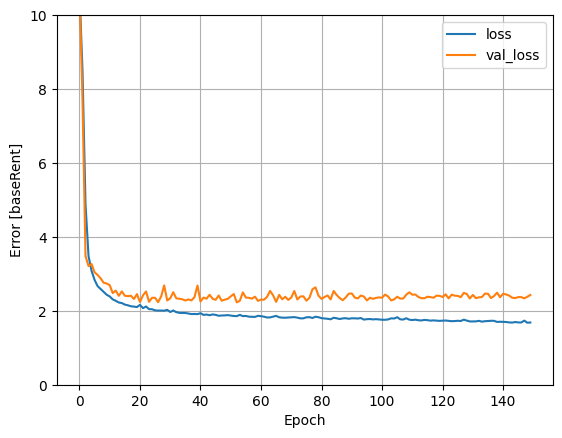

In [344]:
plot_loss(history)

In [346]:
model.evaluate(X_test, y_test)

98/98 [==============================] - 0s 51us/sample - loss: 1.9924


1.9923849592403489

In [366]:
x = 15
for i in range(x):
    print(f'True: {y_test[i:i+1]}, Predicted: {model.predict(X_test[i:i+1]).round()}')

True: [0], Predicted: [[8.]]
True: [12], Predicted: [[10.]]
True: [16], Predicted: [[15.]]
True: [15], Predicted: [[8.]]
True: [13], Predicted: [[11.]]
True: [13], Predicted: [[13.]]
True: [11], Predicted: [[11.]]
True: [13], Predicted: [[12.]]
True: [13], Predicted: [[13.]]
True: [8], Predicted: [[9.]]
True: [15], Predicted: [[13.]]
True: [11], Predicted: [[13.]]
True: [16], Predicted: [[13.]]
True: [11], Predicted: [[10.]]
True: [10], Predicted: [[13.]]


In [347]:
compute_rmse(model, X_test, y_test, 'Portugese')
compute_mae(model, X_test, y_test, 'Portugese')
compute_r2(model, X_test, y_test, 'Portugese')

Root Mean Squared Error for Portugese: 2.740475156178697
Mean Absolute Error for Portugese: 1.9387755102040816
r2 for Portugese: 0.24744376278118618


In [321]:
lgb_train = lgb.Dataset(X_train, y_train)

In [322]:
params = {
    'objective': 'regression',
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}

In [323]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                feature_name=[feat for feat in features.columns],
                )

In [324]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

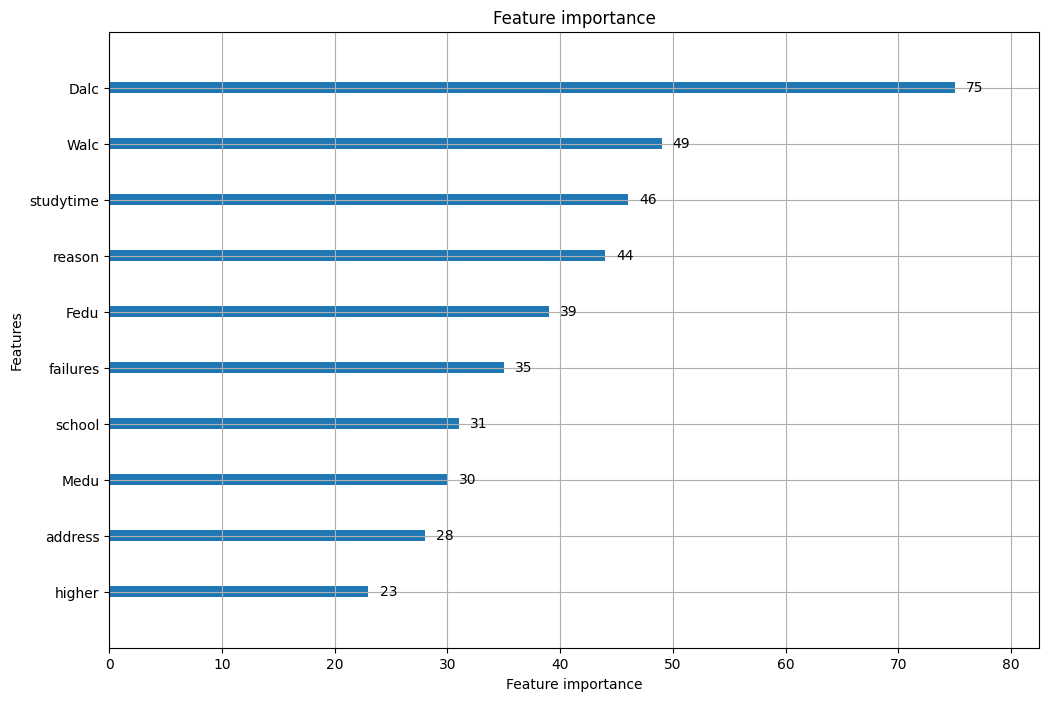

In [325]:
render_plot_importance(importance_type='split')

In [326]:
compute_rmse(gbm, X_test, y_test, 'Portugese')
compute_mae(gbm, X_test, y_test, 'Portugese')
compute_r2(gbm, X_test, y_test, 'Portugese')

Root Mean Squared Error for Portugese: 2.7645717829090897
Mean Absolute Error for Portugese: 1.989795918367347
r2 for Portugese: 0.2341513292433539


In [327]:
dtr = DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [328]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [329]:
compute_rmse(dtr, X_test, y_test, 'Portugese')
compute_mae(dtr, X_test, y_test, 'Portugese')
compute_r2(dtr, X_test, y_test, 'Portugese')

Root Mean Squared Error for Portugese: 2.833833489268196
Mean Absolute Error for Portugese: 2.0714285714285716
r2 for Portugese: 0.19529652351738247


#### Korelacja zmiennych dla ocen z matematyki

<AxesSubplot:>

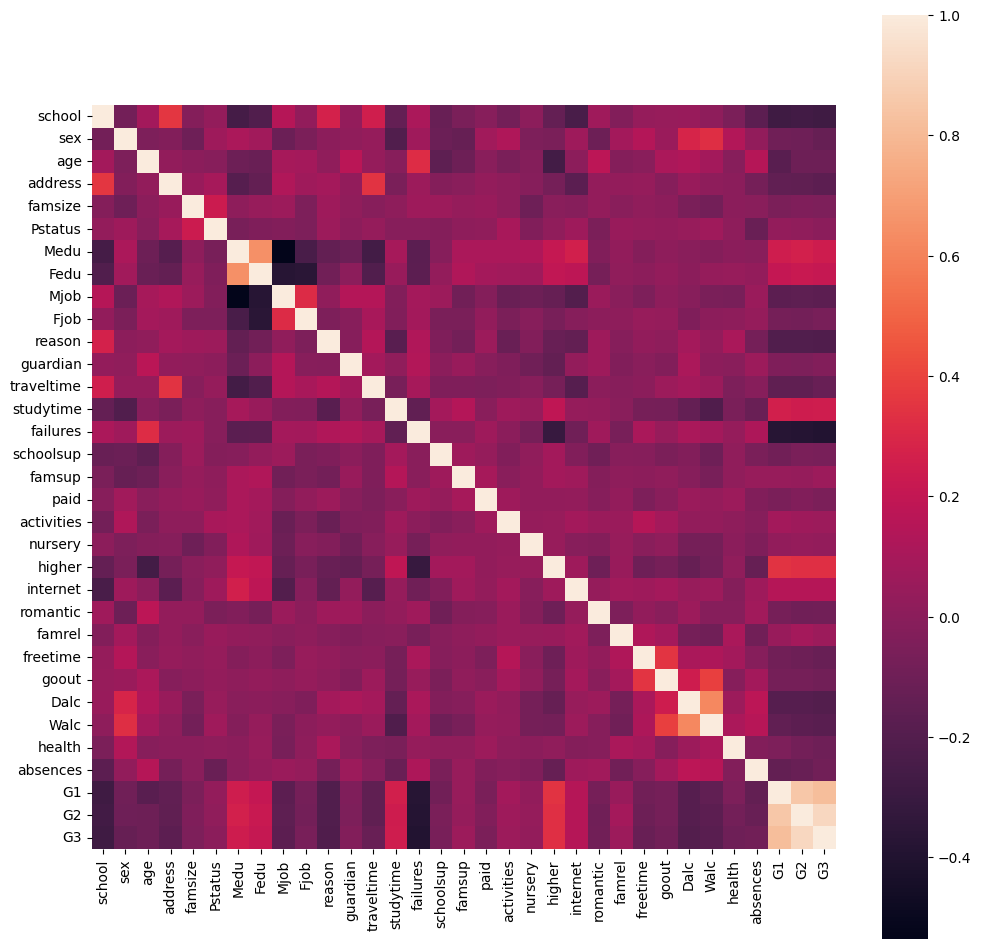

In [17]:
corr_table = df_maths.corr(method='pearson')
# print(corr_table.loc['G3', :])
labels = [feature for feature in df_maths.columns]

f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_portugese.corr(), xticklabels=True, yticklabels=True, square = True)

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)

# ax.matshow(corr_table)
# ax.set_yticks(np.arange(len(labels)))
# ax.set_xticks(np.arange(len(labels)))
# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels, rotation=90)
# ax.set_title('Maths correlation')

# plt.show()

In [ ]:
features = ['Medu', 'Fedu', 'studytime', 'higher', 'failures']

for feature in features:
    df_maths.groupby(feature)['G3'].mean().plot(kind='bar', figsize=(5,4))
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='studytime'>

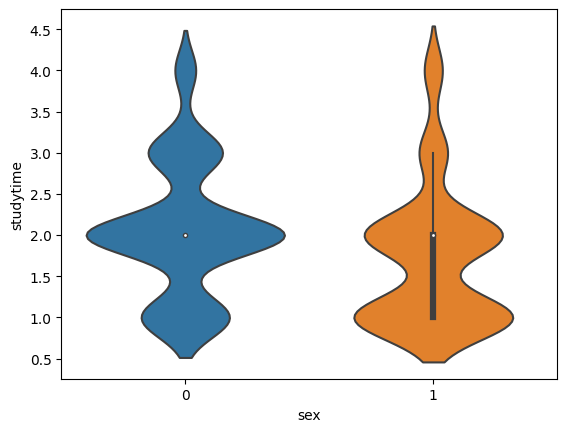

In [27]:
sns.violinplot(data=df_portugese, x='sex', y='studytime')

<AxesSubplot:xlabel='freetime', ylabel='Dalc'>

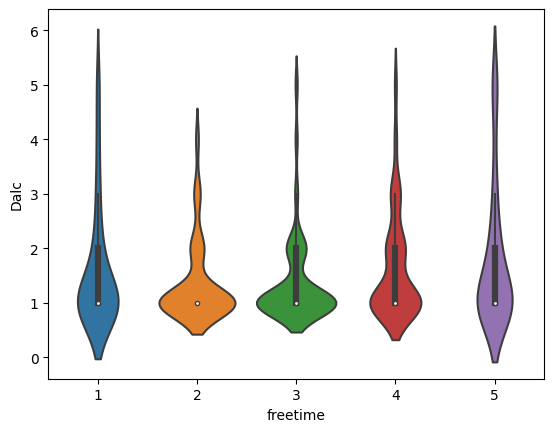

In [29]:
sns.violinplot(data=df_portugese, x='freetime', y='Dalc')

<AxesSubplot:xlabel='studytime', ylabel='Dalc'>

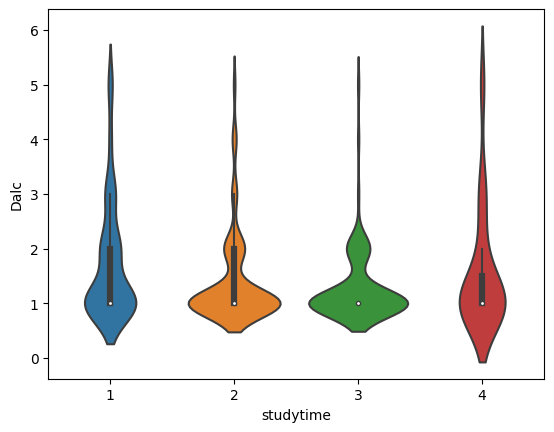

In [30]:
sns.violinplot(data=df_portugese, x='studytime', y='Dalc')

Ponownie, największa korelacja występuje z ocenami z poprzednich lat. Widoczna jest również zależność z wykształceniem rodziców, czasem nauki i chęcią studiowania. Podobnie jak wcześniej, liczba niezaliczonych przedmiotów jest względnie mocno skorelowana z oceną końcową. Inne wnioski:  
- kobiety więcej czasu przeznaczają na naukę,
- osoby częściej spożywające alkohol, mniej czasu przeznaczają na naukę,
- osoby posiadające więcej czasu, częściej spożywają alkohol

In [137]:
y_m = df_maths['G3'].values
X_m = df_maths.iloc[:,:30].values # without G1 and G2

In [138]:
selector_m = SelectKBest(f_regression, k=10)

In [139]:
X_kBest_m = selector_m.fit_transform(X_m, y_m)

In [140]:
mask = selector_m.get_support(indices=True)
features = df_maths.iloc[:, mask]
print(features.columns.values)

['age' 'Medu' 'Fedu' 'Mjob' 'traveltime' 'failures' 'higher' 'internet'
 'romantic' 'goout']


c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


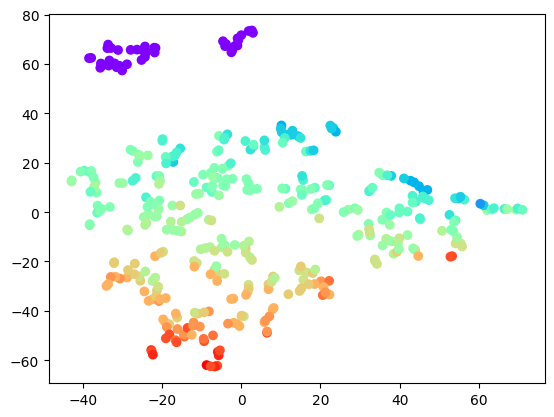

In [141]:
maths_embedded = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='pca').fit_transform(df_maths.iloc[:, 0:33].values)
plt.scatter(x = maths_embedded[:,0], y=maths_embedded[:, 1], cmap=plt.cm.rainbow, c=y_m)

c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


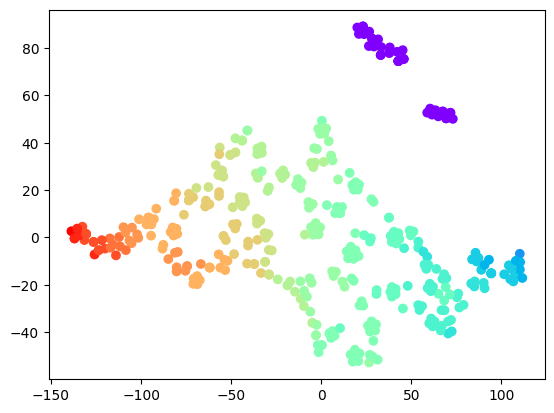

In [63]:
maths_embedded = TSNE(n_components=2, perplexity=10, learning_rate='auto', init='pca').fit_transform(df_maths.iloc[:, 30:33].values)
plt.scatter(x = maths_embedded[:,0], y=maths_embedded[:, 1], cmap=plt.cm.rainbow, c=y_m)

c:\Users\Mateusz\miniconda3\envs\rx6800_tf1\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


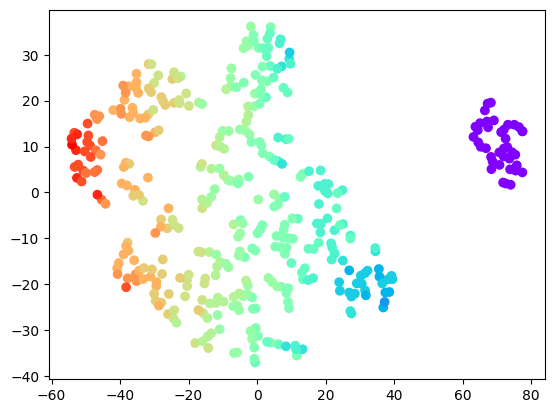

In [142]:
maths_embedded = TSNE(n_components=2, perplexity=10, learning_rate='auto', init='pca').fit_transform(pd.concat([df_maths.loc[:,features.columns], df_maths.loc[:, 'G3']], axis=1))
plt.scatter(x = maths_embedded[:,0], y=maths_embedded[:, 1], cmap=plt.cm.rainbow, c=y_m)

In [143]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_kBest_m, y_m, test_size=.15)

In [158]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_m.shape[1])),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = model.fit(X_train_m, y_train_m, batch_size=32, epochs=50, validation_split=.15)

Train on 286 samples, validate on 51 samples
Epoch 1/50
286/286 [==============================] - 0s 757us/sample - loss: 10.8575 - val_loss: 10.0185
Epoch 2/50
286/286 [==============================] - 0s 52us/sample - loss: 9.2911 - val_loss: 8.6182
Epoch 3/50
286/286 [==============================] - 0s 52us/sample - loss: 7.6539 - val_loss: 6.8771
Epoch 4/50
286/286 [==============================] - 0s 52us/sample - loss: 5.5529 - val_loss: 4.5866
Epoch 5/50
286/286 [==============================] - 0s 49us/sample - loss: 3.7134 - val_loss: 3.9629
Epoch 6/50
286/286 [==============================] - 0s 49us/sample - loss: 3.7746 - val_loss: 3.9204
Epoch 7/50
286/286 [==============================] - 0s 49us/sample - loss: 3.5756 - val_loss: 3.8700
Epoch 8/50
286/286 [==============================] - 0s 49us/sample - loss: 3.5299 - val_loss: 3.8391
Epoch 9/50
286/286 [==============================] - 0s 47us/sample - loss: 3.4801 - val_loss: 3.7930
Epoch 10/50
286/286 [====

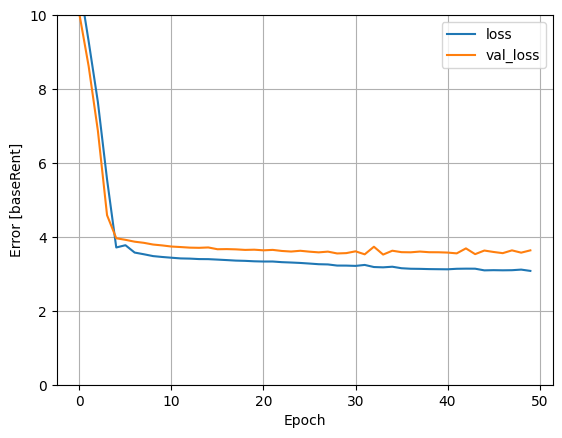

In [160]:
plot_loss(history)

In [161]:
compute_rmse(model, X_test_m, y_test_m, 'Maths')
compute_mae(model, X_test_m, y_test_m, 'Maths')
compute_r2(model, X_test_m, y_test_m, 'Maths')

Root Mean Squared Error for Maths: 4.258325179379017
Mean Absolute Error for Maths: 3.4
R2 for Maths: 0.05962344603062564


In [148]:
lgb_train = lgb.Dataset(X_train_m, y_train_m)

In [149]:
params = {
    'objective': 'regression',
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}

In [150]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                feature_name=[feat for feat in features.columns],
                )

In [151]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

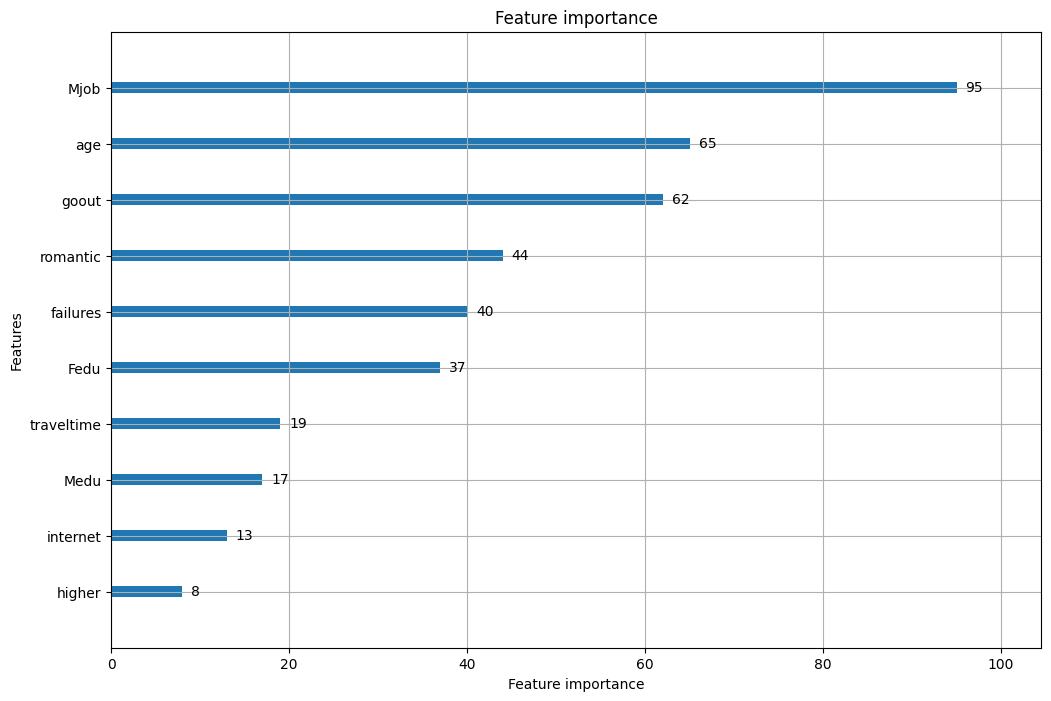

In [154]:
render_plot_importance(importance_type='split')

In [152]:
compute_rmse(gbm, X_test_m, y_test_m, 'Maths')
compute_mae(gbm, X_test_m, y_test_m, 'Maths')
compute_r2(gbm, X_test_m, y_test_m, 'Maths')

Root Mean Squared Error for Maths: 4.181307610465097
Mean Absolute Error for Maths: 3.3833333333333333
R2 for Maths: 0.09333179677033665


In [155]:
dtr = DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [156]:
dtr.fit(X_train_m, y_train_m)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [157]:
compute_rmse(dtr, X_test_m, y_test_m, 'Maths')
compute_mae(dtr, X_test_m, y_test_m, 'Maths')
compute_r2(dtr, X_test_m, y_test_m, 'Maths')

Root Mean Squared Error for Maths: 4.318564576337836
Mean Absolute Error for Maths: 3.4166666666666665
R2 for Maths: 0.0328296287759835
